In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import importlib
import torch
import pandas as pd
import os
import sys
import json
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from recover.utils.utils import get_tensor_dataset
import reservoir as rdl
from copy import deepcopy
import numpy as np
from tqdm import tqdm
from recover.datasets.drugcomb_matrix_data import DrugCombMatrixTrainAlmanac
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme()
sns.set_style("ticks")

In [2]:
def get_all_results(logdir_list):
    
    All_results = None

    for logdir in logdir_list:
        for directory in os.listdir(logdir):
            if directory.startswith("Active"):
                f = open(os.path.join(logdir, directory, "params.json"))
                params = json.load(f)
                f.close()

                progress = pd.read_csv(os.path.join(logdir, directory, "progress.csv"))

                result = pd.DataFrame(progress['top'])
                result['query_true_syn_mean'] = progress['query_true_syn_mean']
                result['n_unique_drugs_in_query'] = progress['n_unique_drugs_in_query']
                result['query_true_syn_quantile_0.5'] = progress['query_true_syn_quantile_0.5']
                result['query_true_syn_quantile_0.0'] = progress['query_true_syn_quantile_0.0']
                result['query_true_syn_quantile_1.0'] = progress['query_true_syn_quantile_1.0']
                result["seen_idxs"] = progress["seen_idxs"]
                result["seen_idxs_in_dataset"] = progress["seen_idxs_in_dataset"]


                result["n_epoch_between_queries"] = params["n_epoch_between_queries"]
                result["acquire_n_at_a_time"] = params["acquire_n_at_a_time"]
                result["n_initial"] = params["n_initial"]
                result["patience_max"] = params["patience_max"]
                result['load_model_weights'] = params['load_model_weights']
                result['acquisition'] = params['acquisition'].split('.')[-1][:-2]
                result['n_initial'] = params['n_initial']
                result['seed'] = params['seed']
                result['kappa'] = params['kappa']
                result['iterations'] = range(len(result))
                result['val_set_prop'] = params['val_set_prop']
                result['target'] = params['target']

                if All_results is None:
                    All_results = result
                else:
                    All_results = pd.concat((All_results, result))
                    
    All_results = All_results.reset_index()
    All_results["seen_idxs_in_dataset"] = \
    All_results["seen_idxs_in_dataset"].apply(lambda l: [int(idx) for idx in l[1:-1].split(", ")])
                    
    return All_results

## Highlight SMO Recover

In [3]:
queried_synergies_recover = []

In [4]:
All_results = get_all_results(["/Users/paul/PycharmProjects/NewReservoir/Recover/RayLogs/highlight_smo_recover"])

In [5]:
dataset = DrugCombMatrixTrainAlmanac(fp_bits=1024, fp_radius=2, cell_line=None, 
                                     study_name="ALMANAC", in_house_data="without", rounds_to_include=[])



Dataset loaded.
11008 drug comb experiments among 148 drugs
	 fingeprints with radius 2 and nbits 1024
	 drug features dimension 1172
	 9 cell-lines
keep only fingerprint features


In [6]:
for idx in All_results.index:
    seen_indices = All_results["seen_idxs_in_dataset"].loc[idx]
    
    if idx % 10 == 9:
        queried_synergies_recover.extend(dataset.data.ddi_edge_bliss_max[seen_indices].tolist())
#         sns.displot(queried_synergies, label= str(idx % 6))
#         plt.xlim(0, 100)
#         plt.legend()
#         plt.title("Distribution over " + str(len(seen_indices)) + " querried examples.")
#         plt.show()

## Highlight SMO Recover no adapt

In [7]:
queried_synergies_recover_no_adapt = []

In [8]:
All_results = get_all_results(["/Users/paul/PycharmProjects/NewReservoir/Recover/RayLogs/highlight_smo_"
                               "recover_no_adapt"])

In [9]:
dataset = DrugCombMatrixTrainAlmanac(fp_bits=1024, fp_radius=2, cell_line=None, 
                                     study_name="ALMANAC", in_house_data="without", rounds_to_include=[])



Dataset loaded.
11008 drug comb experiments among 148 drugs
	 fingeprints with radius 2 and nbits 1024
	 drug features dimension 1172
	 9 cell-lines
keep only fingerprint features


In [10]:
for idx in All_results.index:
    seen_indices = All_results["seen_idxs_in_dataset"].loc[idx]
    
    if idx % 2 == 0:
        queried_synergies_recover_no_adapt.extend(dataset.data.ddi_edge_bliss_max[seen_indices].tolist())
#         sns.displot(queried_synergies, label= str(idx % 6))
#         plt.xlim(0, 100)
#         plt.legend()
#         plt.title("Distribution over " + str(len(seen_indices)) + " querried examples.")
#         plt.show()

## Highlight SMO Deep Synergy

In [11]:
queried_synergies_deep_syn = []

In [12]:
All_results = get_all_results(["/Users/paul/PycharmProjects/NewReservoir/Recover/RayLogs/highlight_smo_deep_syn"])

In [13]:
for idx in All_results.index:
    seen_indices = All_results["seen_idxs_in_dataset"].loc[idx]
    
    if idx % 10 == 9:
        queried_synergies_deep_syn.extend(dataset.data.ddi_edge_bliss_max[seen_indices].tolist())
#         sns.displot(queried_synergies, label= str(idx % 6))
#         plt.xlim(0, 100)
#         plt.legend()
#         plt.title("Distribution over " + str(len(seen_indices)) + " querried examples.")
#         plt.show()

## Highlight SMO Deep Synergy no adapt

In [14]:
queried_synergies_deep_syn_no_adapt = []

In [15]:
All_results = get_all_results(["/Users/paul/PycharmProjects/NewReservoir/Recover/RayLogs/"
                               "highlight_smo_deep_syn_no_adapt"])

In [16]:
for idx in All_results.index:
    seen_indices = All_results["seen_idxs_in_dataset"].loc[idx]
    
    if idx % 2 == 0:
        queried_synergies_deep_syn_no_adapt.extend(dataset.data.ddi_edge_bliss_max[seen_indices].tolist())
#         sns.displot(queried_synergies, label= str(idx % 6))
#         plt.xlim(0, 100)
#         plt.legend()
#         plt.title("Distribution over " + str(len(seen_indices)) + " querried examples.")
#         plt.show()

## Random

In [17]:
from recover.datasets.drugcomb_matrix_data import DrugCombMatrixTrainAlmanac

queried_synergies_random = []

In [18]:
dataset = DrugCombMatrixTrainAlmanac(
    study_name= 'ALMANAC',
    cell_line= None,
    fp_bits= 1024,
    fp_radius= 2
)

Dataset loaded.
11008 drug comb experiments among 148 drugs
	 fingeprints with radius 2 and nbits 1024
	 drug features dimension 1172
	 9 cell-lines
keep only fingerprint features


In [19]:
# Set seed
for seed in [1, 2, 3]:
    torch.manual_seed(seed)
    np.random.seed(seed)

    config = {"val_set_prop": 0.1, 
              "test_set_prop": 0., 
              "split_valid_train": "pair_level",
              "test_on_unseen_cell_line": False, 
              "cell_line": None,
              "target": "bliss_max"}

    train_idxs, _, _ = dataset.random_split(config)
    
    randomly_queried_idxs = train_idxs[torch.randperm(len(train_idxs))][:300]
    
    queried_synergies_random.extend(dataset.data.ddi_edge_bliss_max[randomly_queried_idxs].tolist())

## Analysis

In [20]:
len(queried_synergies_deep_syn)

900

In [21]:
len(queried_synergies_recover)

900

In [22]:
len(queried_synergies_deep_syn_no_adapt)

900

In [23]:
len(queried_synergies_recover_no_adapt)

900

In [24]:
len(queried_synergies_random)

900

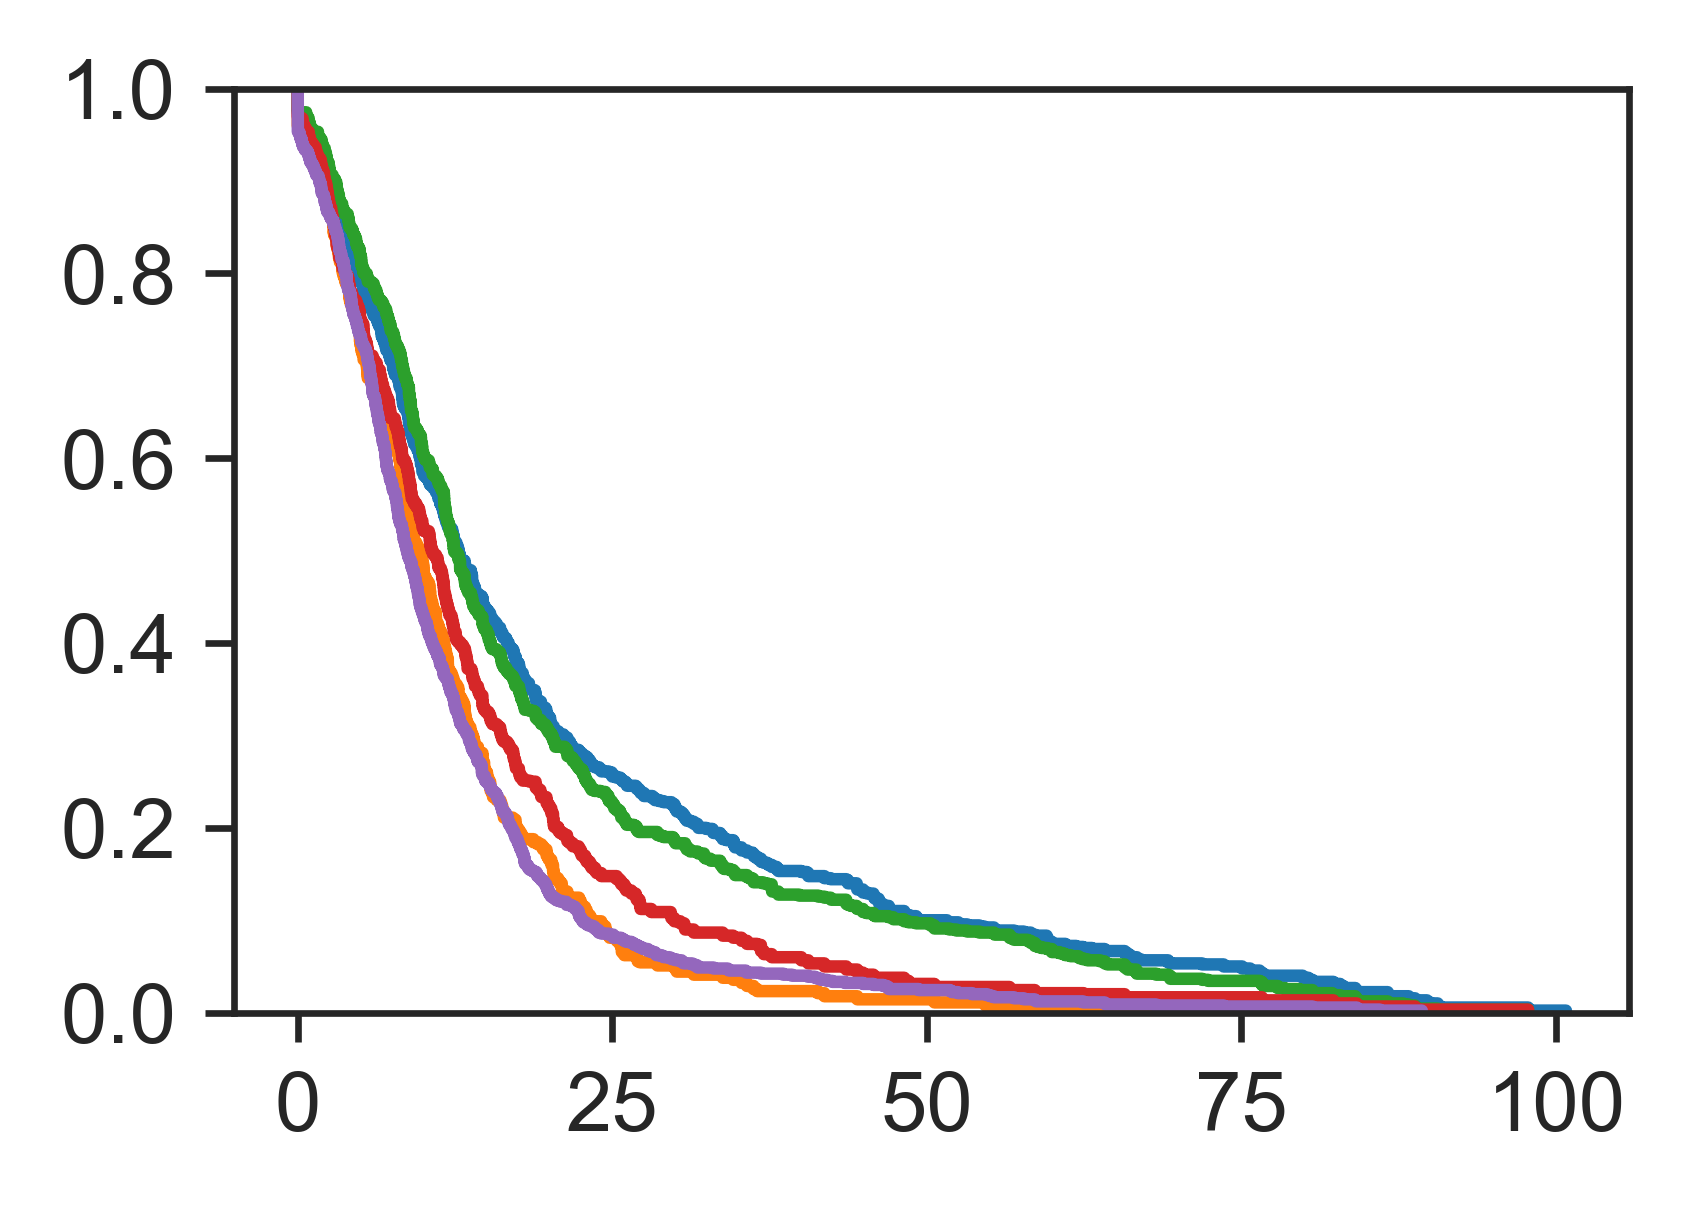

In [25]:
plt.figure(figsize=(3, 2), dpi=600)
sns.ecdfplot(queried_synergies_recover, complementary=True, label="Recover")
sns.ecdfplot(queried_synergies_deep_syn_no_adapt, complementary=True, label="DeepSynergy")
sns.ecdfplot(queried_synergies_deep_syn, complementary=True, label="DeepSynergy (with Recover-style SMO)")
sns.ecdfplot(queried_synergies_recover_no_adapt, complementary=True, label="Recover (without SMO)")
sns.ecdfplot(queried_synergies_random, complementary=True, label="Random")
# plt.legend()

# plt.xlabel("max bliss synergy threshold")
# plt.ylabel("proportion of queried combos with synergy above threshold")
plt.ylabel("")
plt.savefig('test.png', format='png', transparent=True)
# plt.title("Reversed cumulative density of the synergies of all queried combinations")
plt.show()

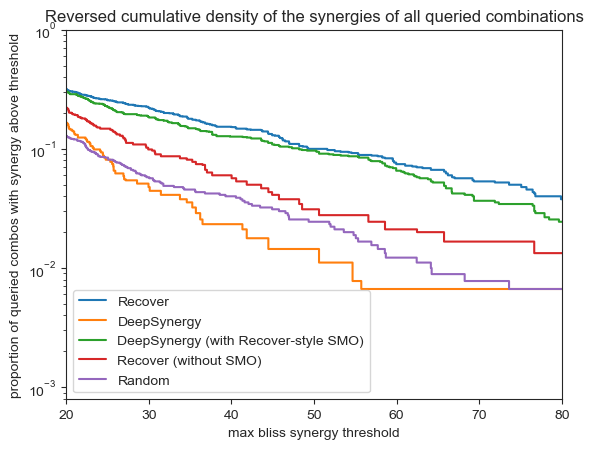

In [26]:
sns.ecdfplot(queried_synergies_recover, complementary=True, label="Recover")
sns.ecdfplot(queried_synergies_deep_syn_no_adapt, complementary=True, label="DeepSynergy")
sns.ecdfplot(queried_synergies_deep_syn, complementary=True, label="DeepSynergy (with Recover-style SMO)")
sns.ecdfplot(queried_synergies_recover_no_adapt, complementary=True, label="Recover (without SMO)")
sns.ecdfplot(queried_synergies_random, complementary=True, label="Random")
plt.legend()

plt.xlabel("max bliss synergy threshold")
plt.ylabel("proportion of queried combos with synergy above threshold")
plt.title("Reversed cumulative density of the synergies of all queried combinations")
plt.yscale('log')
plt.xlim(20, 80)
plt.show()

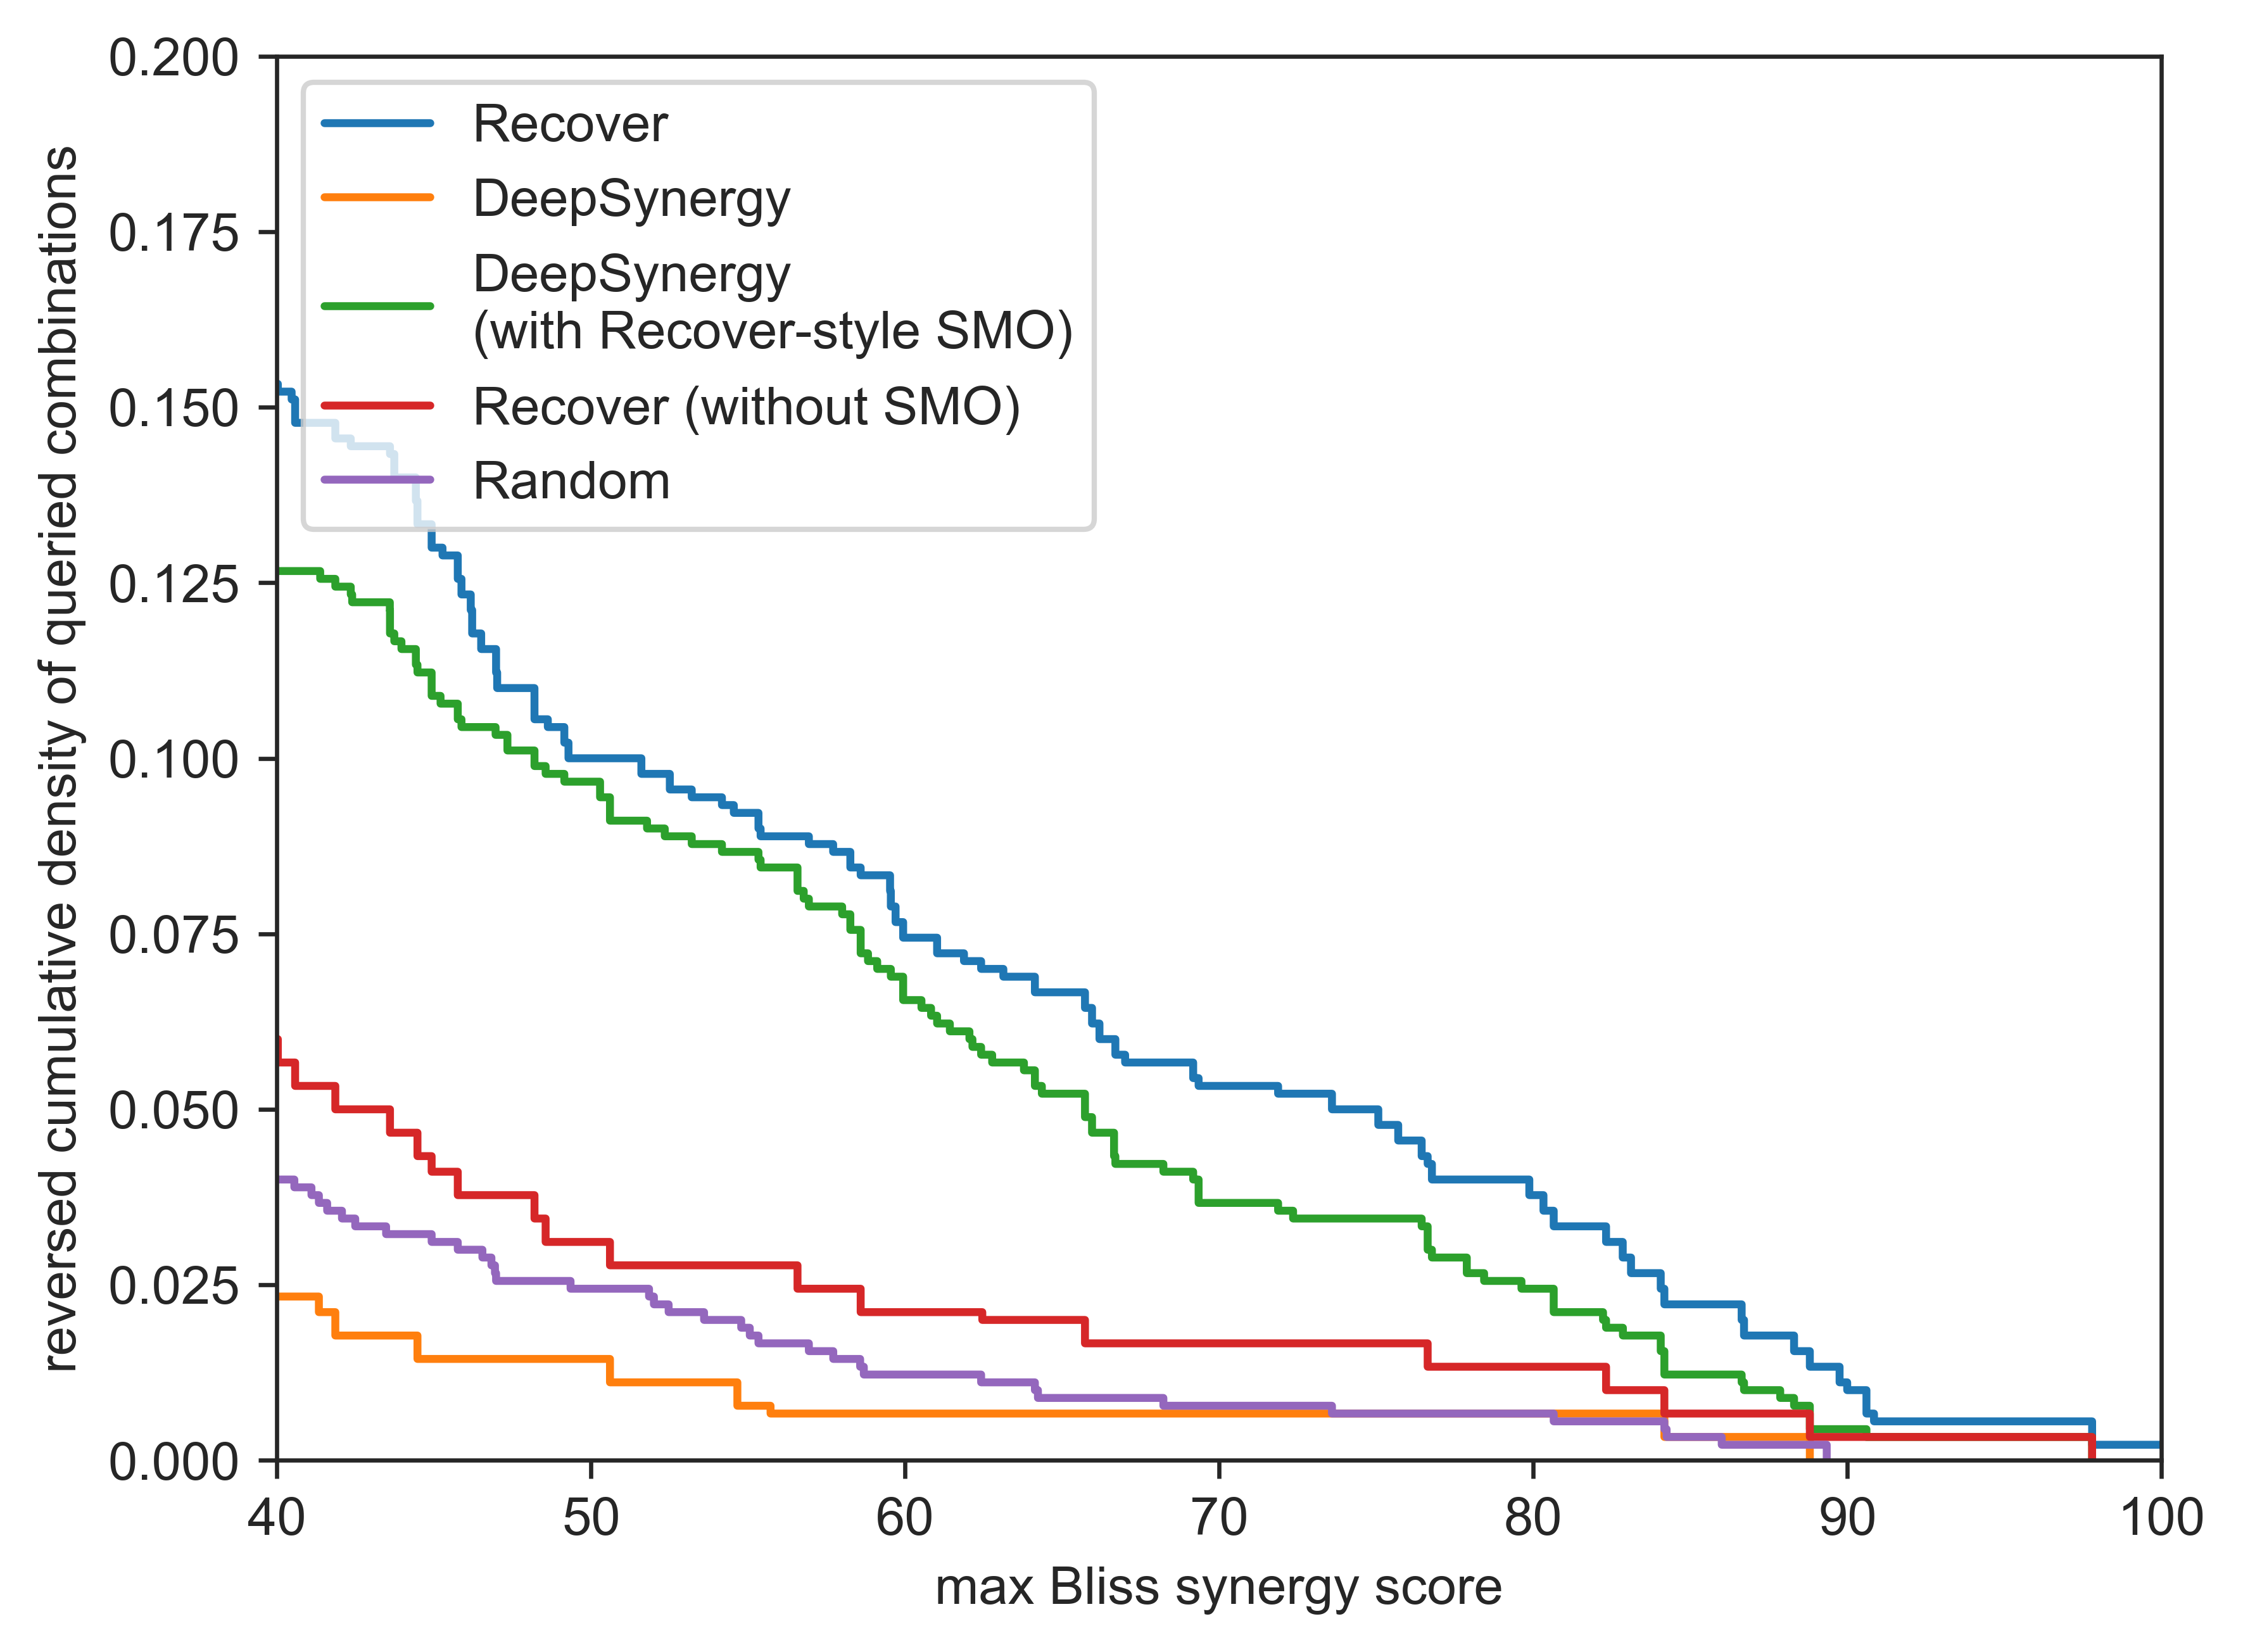

In [27]:
# plt.figure(figsize=(8, 6), dpi=600)
plt.figure(dpi=600)
sns.ecdfplot(queried_synergies_recover, complementary=True, label="Recover")
sns.ecdfplot(queried_synergies_deep_syn_no_adapt, complementary=True, label="DeepSynergy")
sns.ecdfplot(queried_synergies_deep_syn, complementary=True, label="DeepSynergy\n(with Recover-style SMO)")
sns.ecdfplot(queried_synergies_recover_no_adapt, complementary=True, label="Recover (without SMO)")
sns.ecdfplot(queried_synergies_random, complementary=True, label="Random")
plt.legend(loc='upper left') # ,  bbox_to_anchor=(0.1, 1.))

plt.xlabel("max Bliss synergy score")
plt.ylabel("reversed cumulative density of queried combinations")
# plt.title("Reversed cumulative density of the synergies of all queried combinations")
plt.xlim(40, 100)
plt.ylim(0, 0.2)
plt.show()

In [28]:
list_length = len(queried_synergies_recover)

x_min = 0
x_max = 89

reversed_cum_dist_deep_syn = [sum([s > x for s in queried_synergies_deep_syn])/list_length
                     for x in range(x_min, x_max)]
reversed_cum_dist_recover = [sum([s > x for s in queried_synergies_recover])/list_length
                     for x in range(x_min, x_max)]
reversed_cum_dist_deep_syn_no_adapt = [sum([s > x for s in queried_synergies_deep_syn_no_adapt])/list_length 
                     for x in range(x_min, x_max)]
reversed_cum_dist_recover_no_adapt = [sum([s > x for s in queried_synergies_recover_no_adapt])/list_length 
                     for x in range(x_min, x_max)]
reversed_cum_dist_random = [sum([s > x for s in queried_synergies_random])/list_length
                     for x in range(x_min, x_max)]

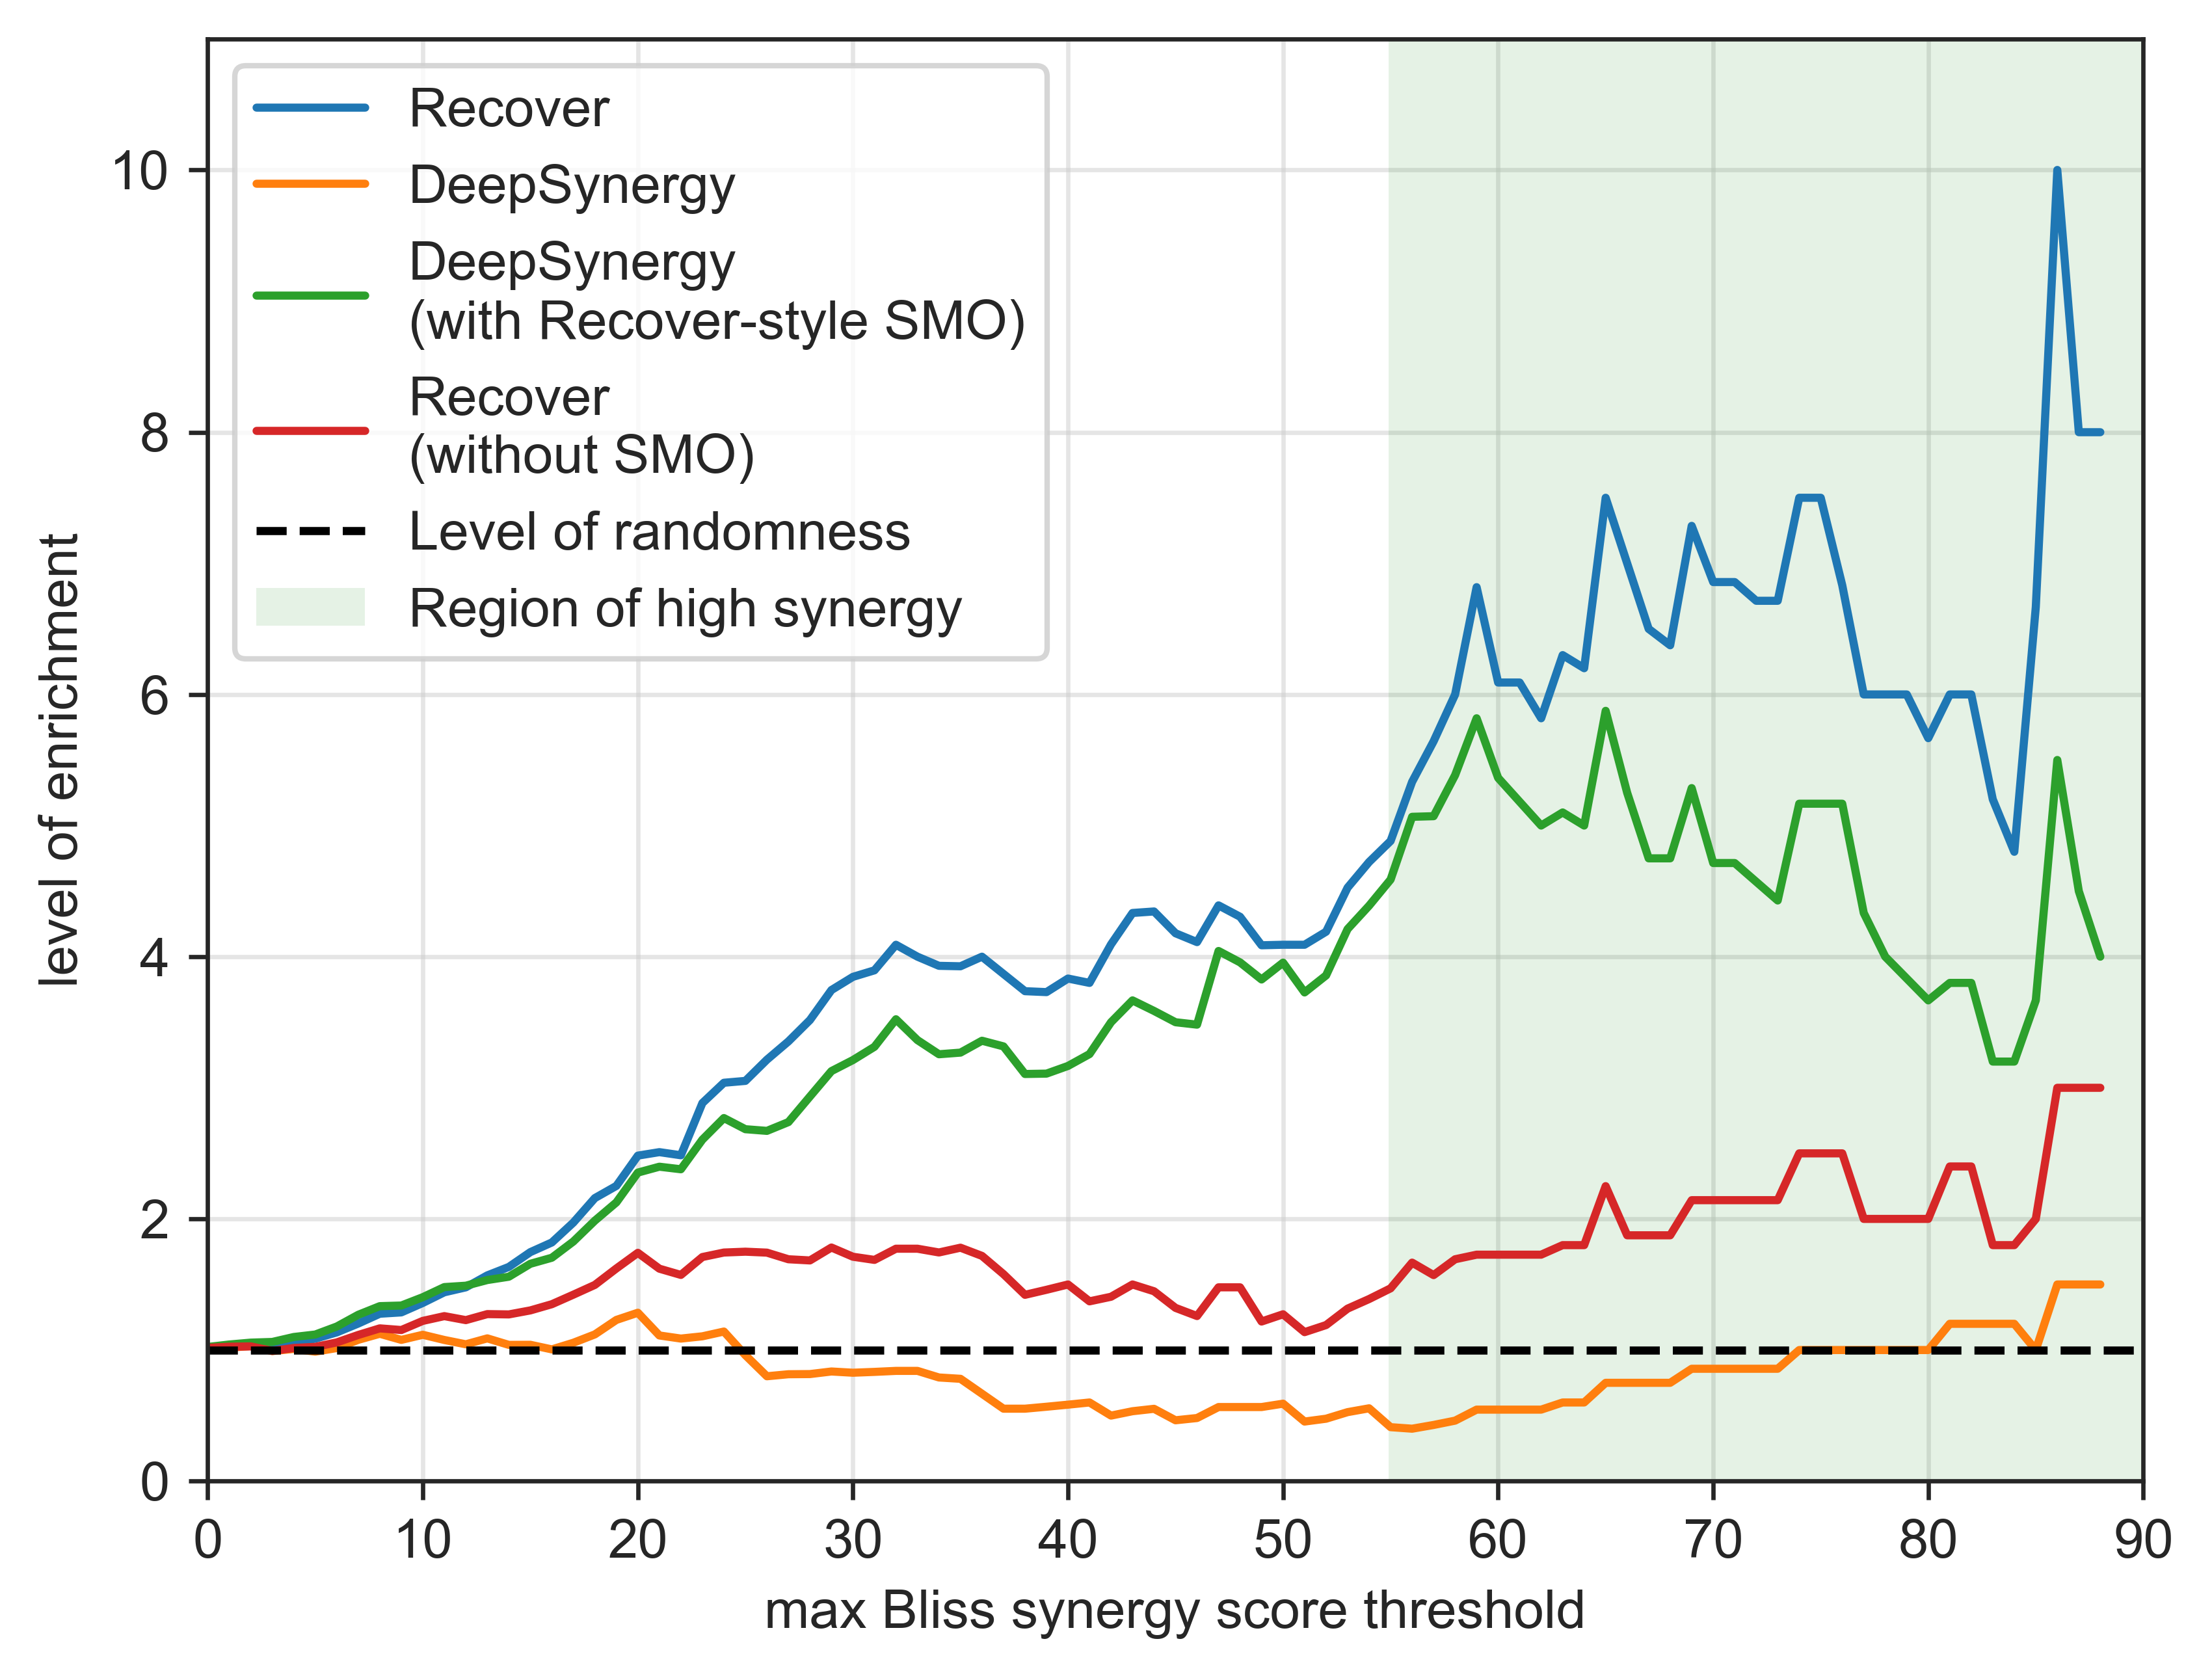

In [29]:
enrichment_deep_syn = [a/(b) for a, b in zip(reversed_cum_dist_deep_syn, reversed_cum_dist_random)]
enrichment_recover = [a/(b) for a, b in zip(reversed_cum_dist_recover, reversed_cum_dist_random)]
enrichment_deep_syn_no_adapt = [a/(b) for a, b in zip(reversed_cum_dist_deep_syn_no_adapt, 
                                                             reversed_cum_dist_random)]
enrichment_recover_no_adapt = [a/(b) for a, b in zip(reversed_cum_dist_recover_no_adapt, 
                                                            reversed_cum_dist_random)]


plt.figure(dpi=600)
plt.plot(range(x_min, x_max), enrichment_recover, label="Recover")
plt.plot(range(x_min, x_max), enrichment_deep_syn_no_adapt, label="DeepSynergy")
plt.plot(range(x_min, x_max), enrichment_deep_syn, label="DeepSynergy\n(with Recover-style SMO)")
plt.plot(range(x_min, x_max), enrichment_recover_no_adapt, label="Recover\n(without SMO)")

plt.axhline(y=1, color='k', linestyle='--', label="Level of randomness")
# plt.axvline(x=54.9, color='k', linestyle='--', label="Level of randomness")
plt.axvspan(xmin=54.9, xmax=90, color='green', alpha=0.1, lw=0, label="Region of high synergy")

# plt.yscale("log")
plt.grid(visible=True, which="major", alpha=0.5)
plt.grid(visible=True, which="minor", alpha=0.2)
# plt.ylim(0.3, 30)
plt.ylim(0, 11)
plt.xlim(0, 90)
plt.legend(loc='upper left')

# minor_ticks = [2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40]
# plt.yticks(minor_ticks, minor=True)
plt.xlabel("max Bliss synergy score threshold")
plt.ylabel("level of enrichment")

plt.show()

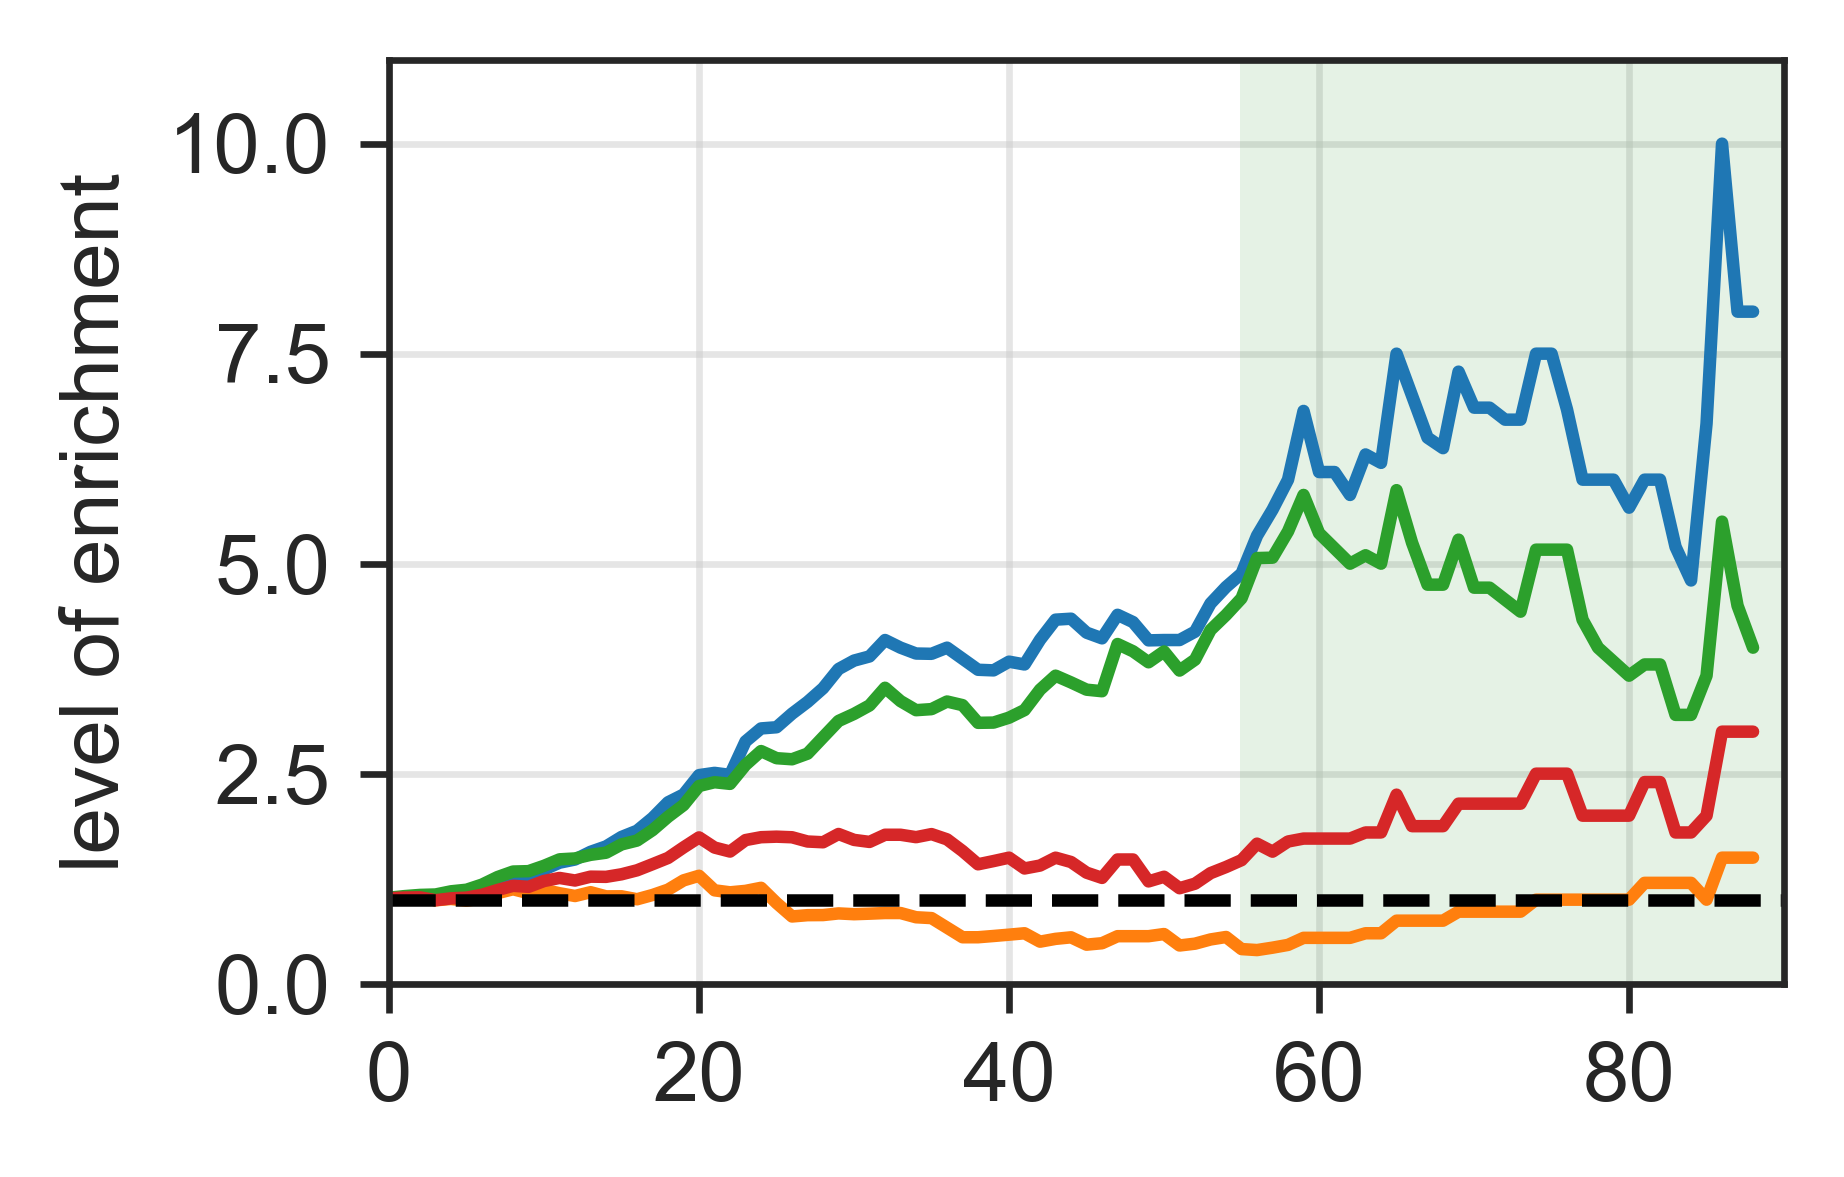

In [30]:
plt.figure(figsize=(3, 2), dpi=600)
plt.plot(range(x_min, x_max), enrichment_recover)
plt.plot(range(x_min, x_max), enrichment_deep_syn_no_adapt)
plt.plot(range(x_min, x_max), enrichment_deep_syn)
plt.plot(range(x_min, x_max), enrichment_recover_no_adapt)

plt.axhline(y=1, color='k', linestyle='--', label="Level of\nrandomness")
# plt.axvline(x=54.9, color='k', linestyle='--', label="Level of randomness")
plt.axvspan(xmin=54.9, xmax=90, color='green', alpha=0.1, lw=0, label="Region of\nhigh synergy")

# plt.yscale("log")
plt.grid(visible=True, which="major", alpha=0.5)
plt.grid(visible=True, which="minor", alpha=0.2)
# plt.ylim(0.3, 30)
plt.ylim(0, 11)
plt.xlim(0, 90)
# plt.legend(loc='upper left')

# minor_ticks = [2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40]
# plt.yticks(minor_ticks, minor=True)
# plt.xlabel("max Bliss synergy score threshold")
plt.ylabel("level of enrichment")

plt.show()

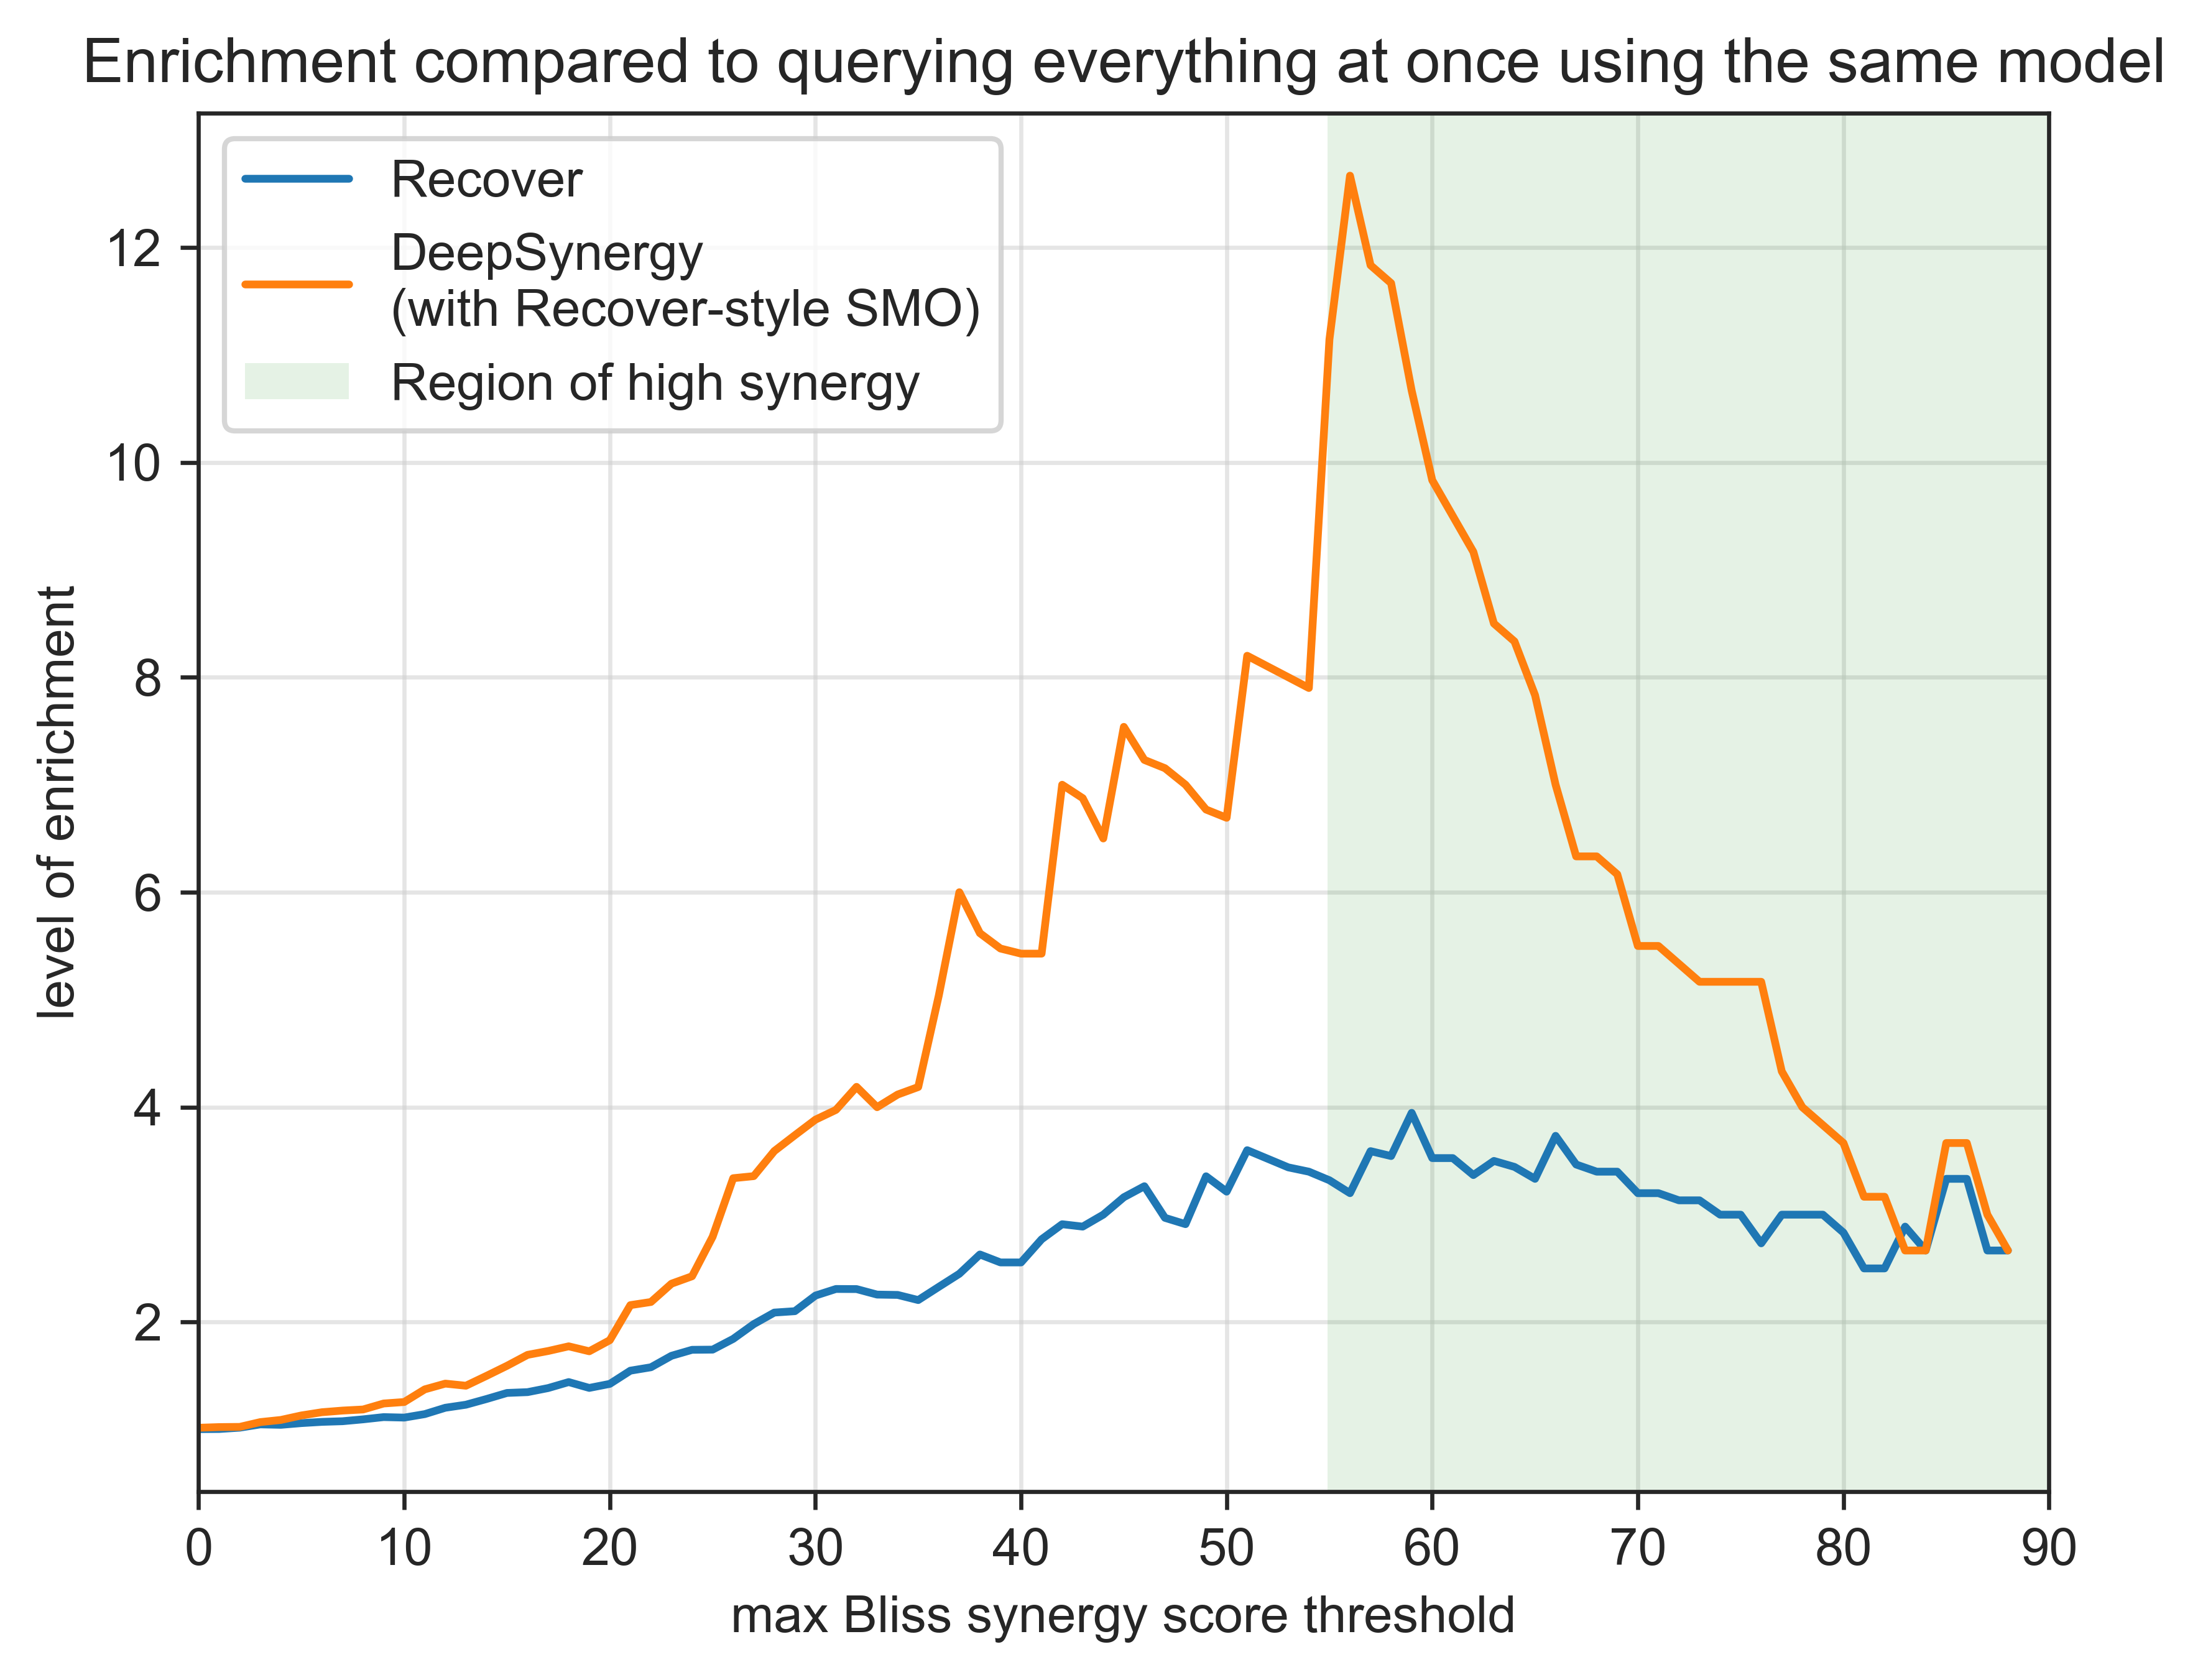

In [33]:
alternative_enrichment_deep_syn = [a/(b) for a, b in zip(reversed_cum_dist_deep_syn, 
                                                         reversed_cum_dist_deep_syn_no_adapt)]
alternative_enrichment_recover = [a/(b) for a, b in zip(reversed_cum_dist_recover, 
                                                        reversed_cum_dist_recover_no_adapt)]


plt.figure(dpi=600)
plt.plot(range(x_min, x_max), alternative_enrichment_recover, label="Recover")
plt.plot(range(x_min, x_max), alternative_enrichment_deep_syn, label="DeepSynergy\n(with Recover-style SMO)")

plt.axvspan(xmin=54.9, xmax=90, color='green', alpha=0.1, lw=0, label="Region of high synergy")

# plt.yscale("log")
plt.grid(visible=True, which="major", alpha=0.5)
plt.grid(visible=True, which="minor", alpha=0.2)
# plt.ylim(0.3, 30)
# plt.ylim(0, 11)
plt.xlim(0, 90)
plt.legend(loc='upper left')

# minor_ticks = [2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40]
# plt.yticks(minor_ticks, minor=True)
plt.xlabel("max Bliss synergy score threshold")
plt.ylabel("level of enrichment")
plt.title("Enrichment compared to querying everything at once using the same model")

plt.show()

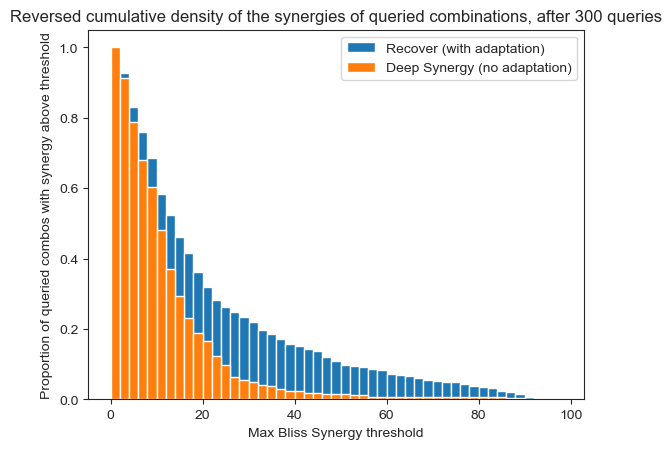

In [33]:
plt.hist(queried_synergies_recover, label="Recover (with adaptation)", cumulative=-1, 
         bins=2*np.arange(50), density=True)
plt.hist(queried_synergies_deep_syn, label="Deep Synergy (no adaptation)", cumulative=-1, bins=2*np.arange(50), 
         density=True)
plt.legend()
plt.xlabel("Max Bliss Synergy threshold")
plt.ylabel("Proportion of queried combos with synergy above threshold")
plt.title("Reversed cumulative density of the synergies of queried combinations, after 300 queries")
plt.show()

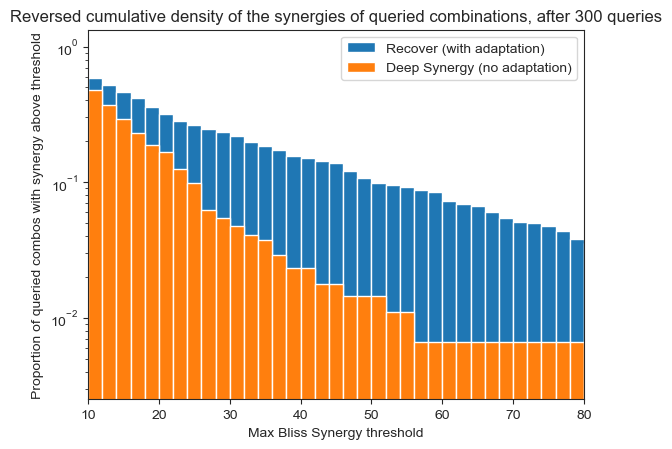

In [35]:
plt.hist(queried_synergies_recover, label="Recover (with adaptation)", cumulative=-1, 
         bins=2*np.arange(50), density=True)
plt.hist(queried_synergies_deep_syn, label="Deep Synergy (no adaptation)", cumulative=-1, bins=2*np.arange(50), 
         density=True)
plt.legend()
plt.xlabel("Max Bliss Synergy threshold")
plt.ylabel("Proportion of queried combos with synergy above threshold")
plt.title("Reversed cumulative density of the synergies of queried combinations, after 300 queries")
plt.xlim(10, 80)
plt.yscale("log")
plt.show()